**Junnan Shimizu**

Spring 2022

CS 252: Mathematical Data Analysis and Visualization

# Lab 2b: 3D Scatter Plots and Rotation Matrices
## Task 1: Setup, Data Import and 3D Scatter Plots

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [57]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [8,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_28573/3276286463.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_28573/3276286463.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


### 1b) Import the Data
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Print the ndarray.

In [58]:
import numpy as np

# Load the data from the CSV file
data = np.loadtxt('data/gauss_3d.csv', delimiter=',')

# Extract X, Y, and Z columns
X = data[:, 0]
Y = data[:, 1]
Z = data[:, 2]

matrix = np.column_stack((X, Y, Z))

print(matrix)

[[  -1.878   -1.013   73.627]
 [ -13.059   17.36    41.08 ]
 [ -12.641   -3.435  174.669]
 [ -15.365   34.323  607.439]
 [  -5.673  -14.979  598.393]
 [ -21.508  -21.41   973.77 ]
 [  -1.276  -19.761  817.145]
 [ -13.806   -8.358  301.274]
 [  -8.405  -11.787  470.952]
 [ -11.247   34.341  605.098]
 [  -2.689    0.103   75.917]
 [ -20.301  -15.14   668.435]
 [ -11.612   21.716  166.265]
 [ -11.92    -3.798  173.865]
 [  -4.331  -13.553  479.397]
 [ -15.499   18.138    6.781]
 [ -10.862   14.35   -15.52 ]
 [ -14.389   -1.524  145.707]
 [  -9.789   26.113  252.389]
 [  -7.086    6.937  -57.971]
 [ -15.503   29.254  350.007]
 [  -4.276   12.541   31.791]
 [  -5.492   28.382  313.531]
 [  -7.488    6.641  -22.467]
 [  -5.496  -13.296  579.077]
 [ -13.419   41.741  993.796]
 [ -10.614   -3.187  146.908]
 [ -14.679    2.017   57.476]
 [ -11.339   -5.506  225.864]
 [  -7.348    1.949   39.089]
 [ -13.458    8.64    17.061]
 [ -11.984    8.027   16.783]
 [ -13.436   14.915   30.182]
 [ -14.226

## Task 2: 3D graphing

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled. 
2. Use dots instead of a solid line.

<IPython.core.display.Javascript object>


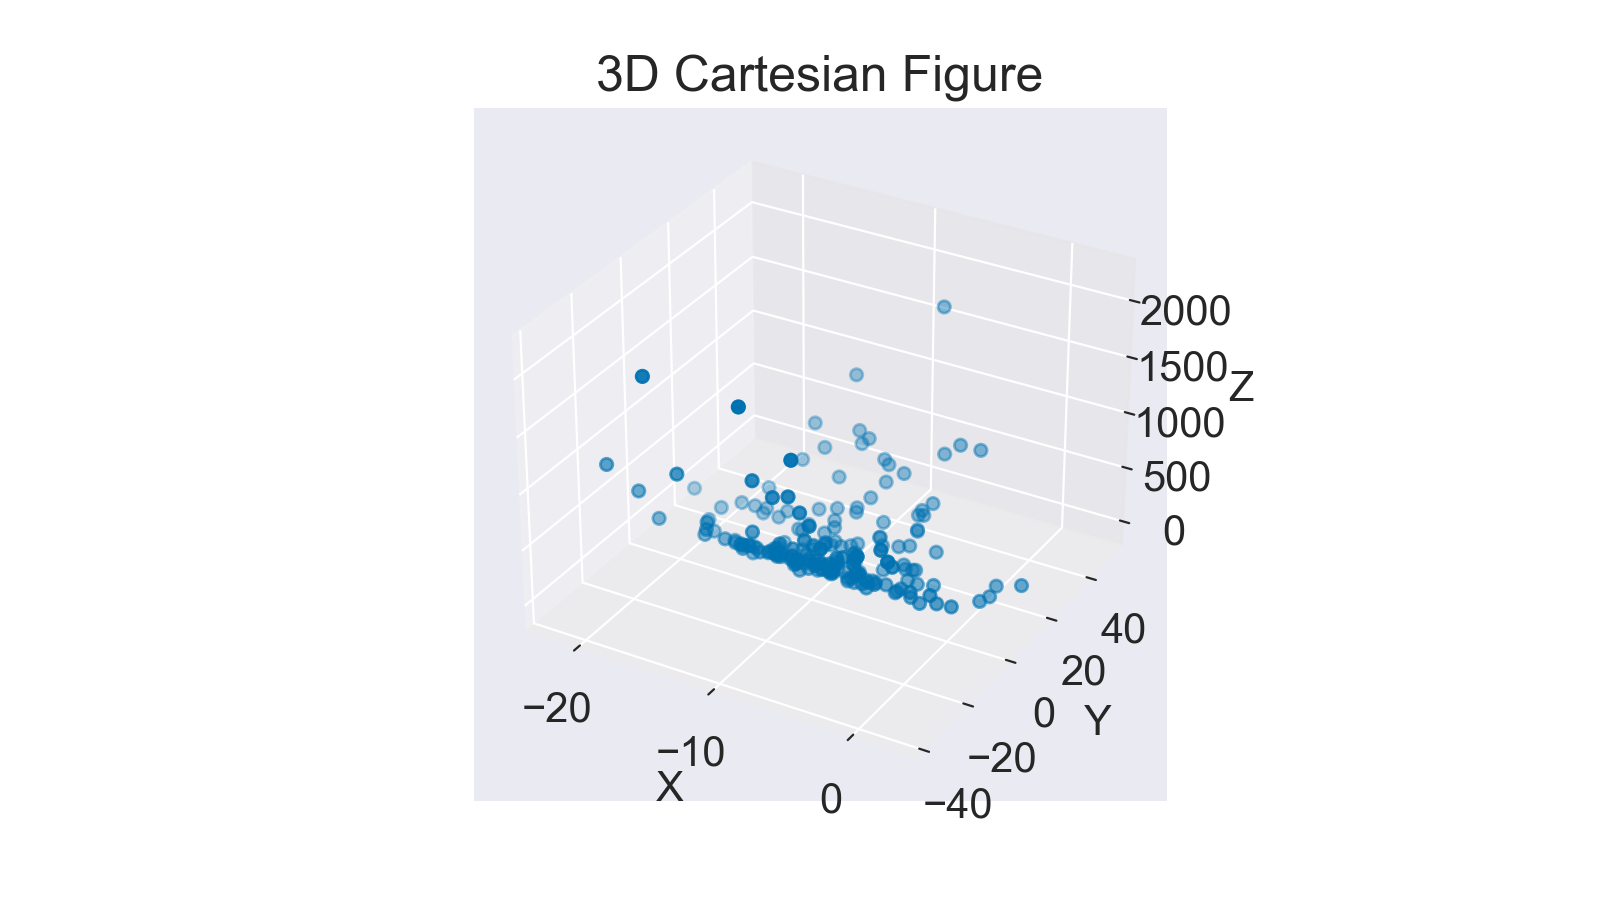

In [59]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = data[:, 0]
Y = data[:, 1]
Z = data[:, 2]

ax.scatter(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Cartesian Figure')

plt.show()



## Task 2: Rotation

### 2a) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [60]:
ones = np.ones(np.shape(X)[0])
data_ones = np.hstack((data, ones[:, np.newaxis]))


print(data_ones)



[[  -1.878   -1.013   73.627    1.   ]
 [ -13.059   17.36    41.08     1.   ]
 [ -12.641   -3.435  174.669    1.   ]
 [ -15.365   34.323  607.439    1.   ]
 [  -5.673  -14.979  598.393    1.   ]
 [ -21.508  -21.41   973.77     1.   ]
 [  -1.276  -19.761  817.145    1.   ]
 [ -13.806   -8.358  301.274    1.   ]
 [  -8.405  -11.787  470.952    1.   ]
 [ -11.247   34.341  605.098    1.   ]
 [  -2.689    0.103   75.917    1.   ]
 [ -20.301  -15.14   668.435    1.   ]
 [ -11.612   21.716  166.265    1.   ]
 [ -11.92    -3.798  173.865    1.   ]
 [  -4.331  -13.553  479.397    1.   ]
 [ -15.499   18.138    6.781    1.   ]
 [ -10.862   14.35   -15.52     1.   ]
 [ -14.389   -1.524  145.707    1.   ]
 [  -9.789   26.113  252.389    1.   ]
 [  -7.086    6.937  -57.971    1.   ]
 [ -15.503   29.254  350.007    1.   ]
 [  -4.276   12.541   31.791    1.   ]
 [  -5.492   28.382  313.531    1.   ]
 [  -7.488    6.641  -22.467    1.   ]
 [  -5.496  -13.296  579.077    1.   ]
 [ -13.419   41.741  993.

<img src="img/Rotation-Matrix.png" align="right" width="200"/>

### 2b) Design a rotation matrix

1. Design a transformation matrix that rotates the dataset 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
  - Print your matrix


In [61]:
angle = 30 * 3.1415 / 180

rot_matrix = np.eye(4)
rot_matrix[0, 0] = np.cos(angle)
rot_matrix[0, 2] = np.sin(angle)
rot_matrix[2, 0] = -np.sin(angle)
rot_matrix[2, 2] = np.cos(angle)

print(rot_matrix)

[[ 0.86603  0.       0.49999  0.     ]
 [ 0.       1.       0.       0.     ]
 [-0.49999  0.       0.86603  0.     ]
 [ 0.       0.       0.       1.     ]]


### 2c) Rotate data and Visualize Results in 2D

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and rotated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the rotated data in different colors.
  - <i>If you implemented a function in the previous lab, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

<IPython.core.display.Javascript object>


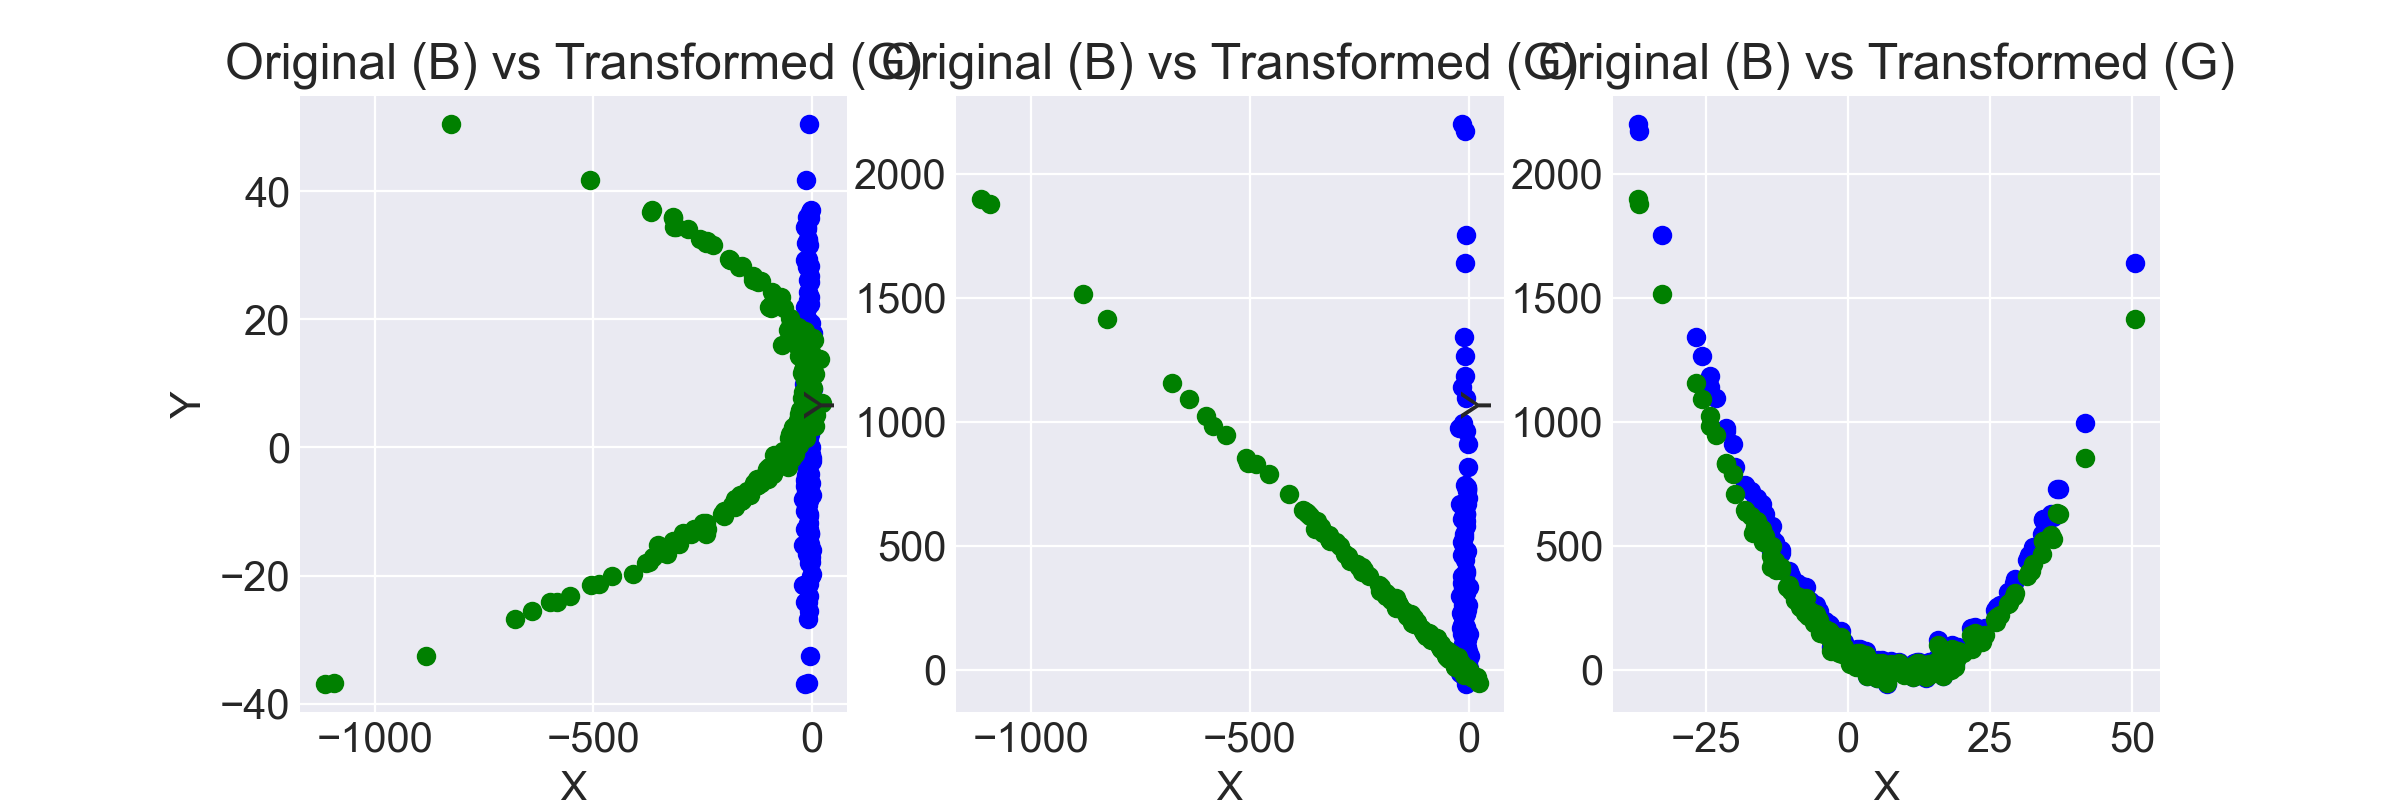

In [109]:
new_matrix = data_ones @ rot_matrix

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

Xt = new_matrix[:, 0]
Yt = new_matrix[:, 1]
Zt = new_matrix[:, 2]

axs[0].scatter(X, Y, color='blue')
axs[0].scatter(Xt, Yt, color='green')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Original (B) vs Transformed (G)')

axs[1].scatter(X, Z, color='blue')
axs[1].scatter(Xt, Zt, color='green')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Original (B) vs Transformed (G)')

axs[2].scatter(Y, Z, color='blue')
axs[2].scatter(Yt, Zt, color='green')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].set_title('Original (B) vs Transformed (G)')

plt.show()


### 2d) Visualize Rotated Data in 3D

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled.  
2. Use dots instead of a solid line.
3. Graph the original dataset and rotated dataset on the same graph.

In [122]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')

ax.scatter(Xt, Yt, Zt)

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

ax.set_xlabel('Xt')
ax.set_ylabel('Yt')
ax.set_zlabel('Zt')
ax.set_title('3D Cartesian Figure')

plt.show()

<IPython.core.display.Javascript object>